## tm_high_order.py

In [1]:
import numpy as np
import random
random.seed(1)

from htm.bindings.sdr import SDR
from htm.algorithms import TemporalMemory as TM

import matplotlib
import matplotlib.pyplot as plt

In [2]:
tm = TM(
  columnDimensions = (2048,),
  cellsPerColumn=8,
  initialPermanence=0.21,
  connectedPermanence=0.3,
  minThreshold=15,
  maxNewSynapseCount=40,
  permanenceIncrement=0.1,
  permanenceDecrement=0.1,
  activationThreshold=15,
  predictedSegmentDecrement=0.01,
  )

In [3]:
sparsity   = 0.02
sparseCols = int(tm.numberOfColumns() * sparsity)
dataset    = {inp : SDR( tm.numberOfColumns() ) for inp in "ABCDXY"}
for i, inp in enumerate("ABCDXY"):
  dataset[inp].dense[ i * sparseCols : (i + 1) * sparseCols ] = 1
  dataset[inp].dense = dataset[inp].dense # この行は、SDR の高密度データが変更されたことを SDR に通知する.
  print("Input", inp, "is bits at indices: [",  i * sparseCols, '-', (i + 1) * sparseCols, ']')

seq1 = "ABCD"
seq2 = "XBCY"
seqT = "ABCDXY"

Input A is bits at indices: [ 0 - 40 ]
Input B is bits at indices: [ 40 - 80 ]
Input C is bits at indices: [ 80 - 120 ]
Input D is bits at indices: [ 120 - 160 ]
Input X is bits at indices: [ 160 - 200 ]
Input Y is bits at indices: [ 200 - 240 ]


In [4]:
tm.reset()
print(tm)

Temporal Memory Connections:
    Inputs (0) ~> Outputs (16384) via Segments (0)
    Segments on Cell Min/Mean/Max 0 / 0 / 0
    Potential Synapses on Segment Min/Mean/Max 4294967295 / nan / 0
    Connected Synapses on Segment Min/Mean/Max 65535 / nan / 0
    Synapses Dead (nan%) Saturated (nan%)
    Synapses pruned (nan%) Segments pruned (nan%)



In [7]:
for t in range(10):
    for inp in seq1:
        v = SDR(dataset[inp])
        tm.compute( v, learn=True)

In [8]:
for inp in seqT:
    print("--- " + inp + " ---")
    sdr = dataset[inp]
    tm.compute( sdr, learn=True)
    tm.activateDendrites(learn=True)
    activeColumnsIndices   = [tm.columnForCell(i) for i in tm.getActiveCells().sparse]
    predictedColumnIndices = [tm.columnForCell(i) for i in tm.getPredictiveCells().sparse]
    print("Active cols: " + str(sorted(set(activeColumnsIndices))))
    print("Predicted cols: " + str(sorted(set(predictedColumnIndices))))
    print("")

--- A ---
Active cols: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39]
Predicted cols: [40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]

--- B ---
Active cols: [40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]
Predicted cols: [80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]

--- C ---
Active cols: [80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
Predicted cols: [120, 121, 122, 123, 124, 125, 126, 127, 128, 

In [20]:
tm = TM(
  columnDimensions = (2048,),
  cellsPerColumn=8,
  initialPermanence=0.21,
  connectedPermanence=0.3,
  minThreshold=15,
  maxNewSynapseCount=40,
  permanenceIncrement=0.1,
  permanenceDecrement=0.1,
  activationThreshold=15,
  predictedSegmentDecrement=0.01,
  )
tm.reset()
print(tm)

Temporal Memory Connections:
    Inputs (0) ~> Outputs (16384) via Segments (0)
    Segments on Cell Min/Mean/Max 0 / 0 / 0
    Potential Synapses on Segment Min/Mean/Max 4294967295 / nan / 0
    Connected Synapses on Segment Min/Mean/Max 65535 / nan / 0
    Synapses Dead (nan%) Saturated (nan%)
    Synapses pruned (nan%) Segments pruned (nan%)



In [21]:
for t in range(10):
    for inp in seq2:
        v = SDR(dataset[inp])
        tm.compute( v, learn=True)

In [22]:
for inp in  seqT:
    print("--- " + inp + " ---")
    sdr = dataset[inp]
    tm.compute( sdr, learn=True)
    tm.activateDendrites(learn=True)
    activeColumnsIndices   = [tm.columnForCell(i) for i in tm.getActiveCells().sparse]
    predictedColumnIndices = [tm.columnForCell(i) for i in tm.getPredictiveCells().sparse]
    print("Active cols: " + str(sorted(set(activeColumnsIndices))))
    print("Predicted cols: " + str(sorted(set(predictedColumnIndices))))
    print("")

--- A ---
Active cols: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39]
Predicted cols: []

--- B ---
Active cols: [40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]
Predicted cols: [80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]

--- C ---
Active cols: [80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
Predicted cols: [200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239]

--

In [37]:
tm = TM(
  columnDimensions = (2048,),
  cellsPerColumn=8,
  initialPermanence=0.21,
  connectedPermanence=0.3,
  minThreshold=15,
  maxNewSynapseCount=40,
  permanenceIncrement=0.1,
  permanenceDecrement=0.1,
  activationThreshold=15,
  predictedSegmentDecrement=0.01,
  )
tm.reset()
print(tm)

Temporal Memory Connections:
    Inputs (0) ~> Outputs (16384) via Segments (0)
    Segments on Cell Min/Mean/Max 0 / 0 / 0
    Potential Synapses on Segment Min/Mean/Max 4294967295 / nan / 0
    Connected Synapses on Segment Min/Mean/Max 65535 / nan / 0
    Synapses Dead (nan%) Saturated (nan%)
    Synapses pruned (nan%) Segments pruned (nan%)



In [38]:
for t in range(100):
  seq = random.choice([ seq1, seq2 ])
  for inp in seq:
    tm.compute( dataset[inp], learn=True)

In [26]:
for inp in  seqT:
    print("--- " + inp + " ---")
    sdr = dataset[inp]
    tm.compute( sdr, learn=True)
    tm.activateDendrites(learn=True)
    activeColumnsIndices   = [tm.columnForCell(i) for i in tm.getActiveCells().sparse]
    predictedColumnIndices = [tm.columnForCell(i) for i in tm.getPredictiveCells().sparse]
    print("Active cols: " + str(sorted(set(activeColumnsIndices))))
    print("Predicted cols: " + str(sorted(set(predictedColumnIndices))))
    print("")

--- A ---
Active cols: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39]
Predicted cols: [40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]

--- B ---
Active cols: [40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]
Predicted cols: [80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]

--- C ---
Active cols: [80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
Predicted cols: [120, 121, 122, 123, 124, 125, 126, 127, 128, 

In [36]:
for inp in  seqT:
    print("--- " + inp + " ---")
    sdr = dataset[inp]

    tm.compute( sdr, learn=True)
    tm.activateDendrites(learn=True)

    print("Active sdr: ", tm.getActiveCells())    
    print("Predicted sdr: ",tm.getPredictiveCells())

--- A ---
Active sdr:  SDR( 2048, 8 ) 0, 8, 16, 24, 32, 40, 48, 56, 64, 72, 80, 88, 96, 104, 112, 120, 128, 136, 144, 152, 160, 168, 176, 184, 192, 200, 208, 216, 224, 232, 240, 248, 256, 264, 272, 280, 288, 296, 304, 312
Predicted sdr:  SDR( 2048, 8 ) 321, 329, 337, 345, 353, 361, 369, 377, 385, 393, 401, 409, 417, 425, 433, 441, 449, 457, 465, 473, 481, 489, 497, 505, 513, 521, 529, 537, 545, 553, 561, 569, 577, 585, 593, 601, 609, 617, 625, 633
--- B ---
Active sdr:  SDR( 2048, 8 ) 321, 329, 337, 345, 353, 361, 369, 377, 385, 393, 401, 409, 417, 425, 433, 441, 449, 457, 465, 473, 481, 489, 497, 505, 513, 521, 529, 537, 545, 553, 561, 569, 577, 585, 593, 601, 609, 617, 625, 633
Predicted sdr:  SDR( 2048, 8 ) 641, 649, 657, 665, 673, 681, 689, 697, 705, 713, 721, 729, 737, 745, 753, 761, 769, 777, 785, 793, 801, 809, 817, 825, 833, 841, 849, 857, 865, 873, 881, 889, 897, 905, 913, 921, 929, 937, 945, 953
--- C ---
Active sdr:  SDR( 2048, 8 ) 641, 649, 657, 665, 673, 681, 689, 697, 705

Active sdr:  SDR( 2048, 8 ) 0, 8, 16, 24, 32, 40, 48, 56, 64, 72, 80, 88, 96, 104, 112, 120, 128, 136, 144, 152, 160, 168, 176, 184, 192, 200, 208, 216, 224, 232, 240, 248, 256, 264, 272, 280, 288, 296, 304, 312


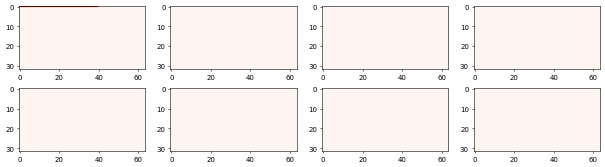

Predicted sdr:  SDR( 2048, 8 ) 320, 328, 336, 344, 352, 360, 368, 376, 384, 392, 400, 408, 416, 424, 432, 440, 448, 456, 464, 472, 480, 488, 496, 504, 512, 520, 528, 536, 544, 552, 560, 568, 576, 584, 592, 600, 608, 616, 624, 632


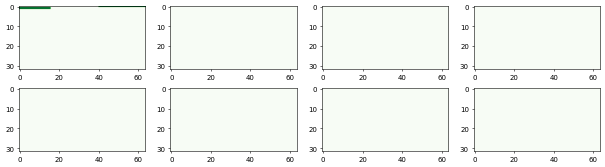

Active sdr:  SDR( 2048, 8 ) 320, 328, 336, 344, 352, 360, 368, 376, 384, 392, 400, 408, 416, 424, 432, 440, 448, 456, 464, 472, 480, 488, 496, 504, 512, 520, 528, 536, 544, 552, 560, 568, 576, 584, 592, 600, 608, 616, 624, 632


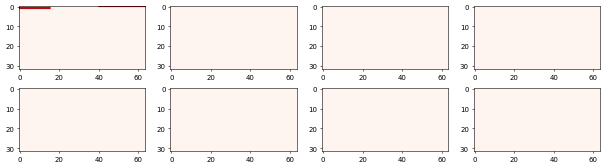

Predicted sdr:  SDR( 2048, 8 ) 640, 648, 656, 664, 672, 680, 688, 696, 704, 712, 720, 728, 736, 744, 752, 760, 768, 776, 784, 792, 800, 808, 816, 824, 832, 840, 848, 856, 864, 872, 880, 888, 896, 904, 912, 920, 928, 936, 944, 952


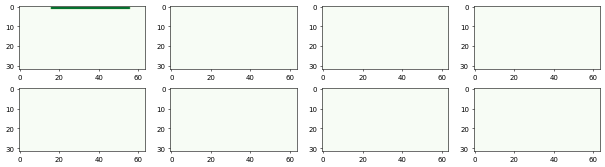

Active sdr:  SDR( 2048, 8 ) 640, 648, 656, 664, 672, 680, 688, 696, 704, 712, 720, 728, 736, 744, 752, 760, 768, 776, 784, 792, 800, 808, 816, 824, 832, 840, 848, 856, 864, 872, 880, 888, 896, 904, 912, 920, 928, 936, 944, 952


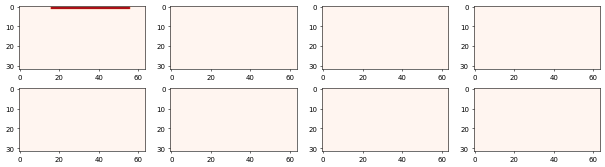

Predicted sdr:  SDR( 2048, 8 ) 960, 968, 976, 984, 992, 1000, 1008, 1016, 1024, 1032, 1040, 1048, 1056, 1064, 1072, 1080, 1088, 1096, 1104, 1112, 1120, 1128, 1136, 1144, 1152, 1160, 1168, 1176, 1184, 1192, 1200, 1208, 1216, 1224, 1232, 1240, 1248, 1256, 1264, 1272, 1600, 1608, 1616, 1624, 1632, 1640, 1648, 1656, 1664, 1672, 1680, 1688, 1696, 1704, 1712, 1720, 1728, 1736, 1744, 1752, 1760, 1768, 1776, 1784, 1792, 1800, 1808, 1816, 1824, 1832, 1840, 1848, 1856, 1864, 1872, 1880, 1888, 1896, 1904, 1912


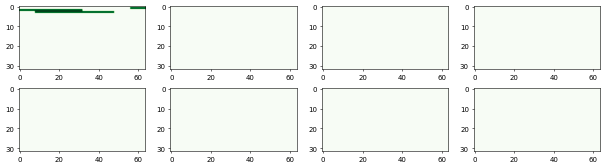

Active sdr:  SDR( 2048, 8 ) 960, 968, 976, 984, 992, 1000, 1008, 1016, 1024, 1032, 1040, 1048, 1056, 1064, 1072, 1080, 1088, 1096, 1104, 1112, 1120, 1128, 1136, 1144, 1152, 1160, 1168, 1176, 1184, 1192, 1200, 1208, 1216, 1224, 1232, 1240, 1248, 1256, 1264, 1272


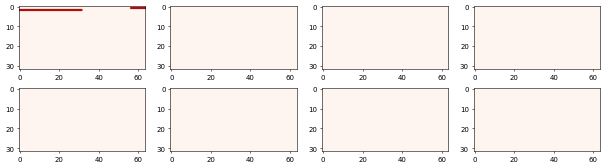

Predicted sdr:  SDR( 2048, 8 ) 0, 8, 16, 24, 32, 40, 48, 56, 64, 72, 80, 88, 96, 104, 112, 120, 128, 136, 144, 152, 160, 168, 176, 184, 192, 200, 208, 216, 224, 232, 240, 248, 256, 264, 272, 280, 288, 296, 304, 312, 1280, 1288, 1296, 1304, 1312, 1320, 1328, 1336, 1344, 1352, 1360, 1368, 1376, 1384, 1392, 1400, 1408, 1416, 1424, 1432, 1440, 1448, 1456, 1464, 1472, 1480, 1488, 1496, 1504, 1512, 1520, 1528, 1536, 1544, 1552, 1560, 1568, 1576, 1584, 1592


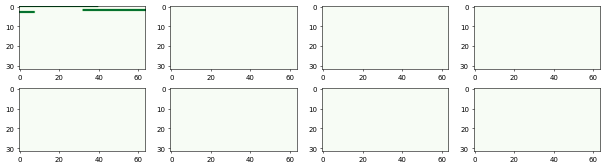

Active sdr:  SDR( 2048, 8 ) 1280, 1288, 1296, 1304, 1312, 1320, 1328, 1336, 1344, 1352, 1360, 1368, 1376, 1384, 1392, 1400, 1408, 1416, 1424, 1432, 1440, 1448, 1456, 1464, 1472, 1480, 1488, 1496, 1504, 1512, 1520, 1528, 1536, 1544, 1552, 1560, 1568, 1576, 1584, 1592


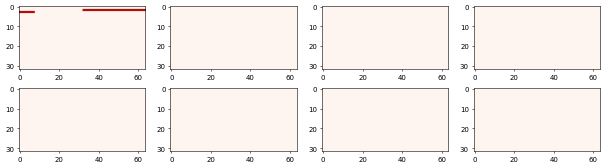

Predicted sdr:  SDR( 2048, 8 ) 321, 329, 337, 345, 353, 361, 369, 377, 385, 393, 401, 409, 417, 425, 433, 441, 449, 457, 465, 473, 481, 489, 497, 505, 513, 521, 529, 537, 545, 553, 561, 569, 577, 585, 593, 601, 609, 617, 625, 633


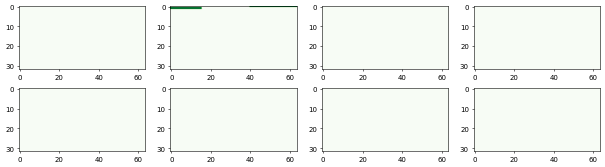

Active sdr:  SDR( 2048, 8 ) 1600, 1601, 1602, 1603, 1604, 1605, 1606, 1607, 1608, 1609, 1610, 1611, 1612, 1613, 1614, 1615, 1616, 1617, 1618, 1619, 1620, 1621, 1622, 1623, 1624, 1625, 1626, 1627, 1628, 1629, 1630, 1631, 1632, 1633, 1634, 1635, 1636, 1637, 1638, 1639, 1640, 1641, 1642, 1643, 1644, 1645, 1646, 1647, 1648, 1649, 1650, 1651, 1652, 1653, 1654, 1655, 1656, 1657, 1658, 1659, 1660, 1661, 1662, 1663, 1664, 1665, 1666, 1667, 1668, 1669, 1670, 1671, 1672, 1673, 1674, 1675, 1676, 1677, 1678, 1679, 1680, 1681, 1682, 1683, 1684, 1685, 1686, 1687, 1688, 1689, 1690, 1691, 1692, 1693, 1694, 1695, 1696, 1697, 1698, 1699, 1700, 1701, 1702, 1703, 1704, 1705, 1706, 1707, 1708, 1709, 1710, 1711, 1712, 1713, 1714, 1715, 1716, 1717, 1718, 1719, 1720, 1721, 1722, 1723, 1724, 1725, 1726, 1727, 1728, 1729, 1730, 1731, 1732, 1733, 1734, 1735, 1736, 1737, 1738, 1739, 1740, 1741, 1742, 1743, 1744, 1745, 1746, 1747, 1748, 1749, 1750, 1751, 1752, 1753, 1754, 1755, 1756, 1757, 1758, 1759, 1760, 1761, 

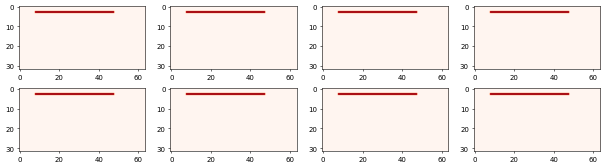

Predicted sdr:  SDR( 2048, 8 ) 1, 2, 9, 10, 17, 18, 25, 26, 33, 34, 41, 42, 49, 50, 57, 58, 65, 66, 73, 74, 81, 82, 89, 90, 97, 98, 105, 106, 113, 114, 121, 122, 129, 130, 137, 138, 145, 146, 153, 154, 161, 162, 169, 170, 177, 178, 185, 186, 193, 194, 201, 202, 209, 210, 217, 218, 225, 226, 233, 234, 241, 242, 249, 250, 257, 258, 265, 266, 273, 274, 281, 282, 289, 290, 297, 298, 305, 306, 313, 314, 1281, 1282, 1284, 1289, 1290, 1292, 1297, 1298, 1300, 1305, 1306, 1308, 1313, 1314, 1316, 1321, 1322, 1324, 1329, 1330, 1332, 1337, 1338, 1340, 1345, 1346, 1348, 1353, 1354, 1356, 1361, 1362, 1364, 1369, 1370, 1372, 1377, 1378, 1380, 1385, 1386, 1388, 1393, 1394, 1396, 1401, 1402, 1404, 1409, 1410, 1412, 1417, 1418, 1420, 1425, 1426, 1428, 1433, 1434, 1436, 1441, 1442, 1444, 1449, 1450, 1452, 1457, 1458, 1460, 1465, 1466, 1468, 1473, 1474, 1476, 1481, 1482, 1484, 1489, 1490, 1492, 1497, 1498, 1500, 1505, 1506, 1508, 1513, 1514, 1516, 1521, 1522, 1524, 1529, 1530, 1532, 1537, 1538, 1540, 1545

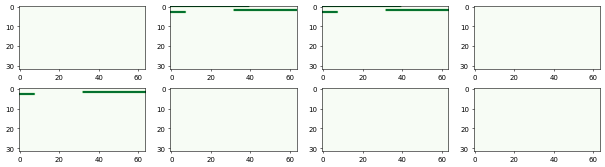

In [39]:
for inp in  seqT:
    sdr = dataset[inp]

    tm.compute( sdr, learn=True)
    tm.activateDendrites(learn=True)

    print("Active sdr: ", tm.getActiveCells())
    
    reshapeActiveCells =tm.getActiveCells().dense.transpose().reshape(8,32,64)

    plot = plt.figure(figsize=(15,4),dpi=50)
    
    for j in range(8):
        plt.subplot(2,4,j+1)
        plt.imshow(reshapeActiveCells[j], cmap = "Reds")
    plt.show()
    
    print("Predicted sdr: ",tm.getPredictiveCells())
    
    reshapePredictiveCells=tm.getPredictiveCells().dense.transpose().reshape(8,32,64)

    plot = plt.figure(figsize=(15,4),dpi=50)
    
    for k in range(8):
        plt.subplot(2,4,k+1)
        plt.imshow(reshapePredictiveCells[k], cmap = "Greens")
    plt.show()